## Import libraries

In [1]:
import sqlite3
import urllib.request
import pandas as pd

## Load Dataset

#### Quick view of data
- The .head() method is used to quickly view the first few rows
- Composite values are observed for Model and Factory
- Binary values are observed for the target variables Failure A to Failure E

In [2]:
urllib.request.urlretrieve("https://techassessment.blob.core.windows.net/aiapbg11-assessment-data/failure.db", "failure.db")
conn = sqlite3.connect("failure.db")

df = pd.read_sql_query("SELECT * FROM failure", conn)
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


#### Features and data types
- The .info() method is used to display features and their data types
- Temperature data type appears to be object instead of float
- Data types of the target variables are confirmed to be integers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


#### Descriptive statistics
- The .describe() method is used to generate descriptive statistics
- Negative values observed for RPM

In [4]:
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,1470.626823,679.472304,0.025692,0.018550,0.031049,0.024502,0.026386
std,487.502419,58.486101,0.158222,0.134935,0.173457,0.154608,0.160289
min,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1418.000000,638.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

#### Missing values
- The .isna().sum() method is used to identify and count the number of missing values
- Missing values appear to be present

In [5]:
df.isna().sum()

Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          384
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64

#### Size of missing values
- The .shape attribute is used to compare the number of missing data relative to the size of the dataset
- Since missing data is minimal, using mode to impute can help maintain the overall distribution of the data without introducing significant bias

In [6]:
missing = df['Membership'].isna().sum()
total = df.shape[0]
print(missing/total)

0.03809145918063684


#### Composite values
- The .str.split() method is used to split composite values
- The .head() method is used to ensure the components have seperated
- The .astype() method is used to correct the data type for Year
- Separated components can now be analyzed individually

In [7]:
df[['Model_Name', 'Year']] = df['Model'].str.split(', ', expand=True)
df[['City', 'Country']] = df['Factory'].str.split(', ', expand=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model_Name,Year,City,Country
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0,Model 5,2022,Shang Hai,China
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0,Model 3,2022,Shang Hai,China
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0,Model 3,2022,Shang Hai,China
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0,Model 3,2022,Berlin,Germany
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0,Model 3,2022,New York,U.S


#### Extract decimal from string
- The .search() method is used to find the decimal number within values in Temp
- The float() method converts the found value to float
- The .info() method is used to ensure the data type for Temperature is converted
- The converted temperature values are in a new column Temperature_C and available as float

In [8]:
import re

def return_temp(length):
    temp = re.search('\d+\.\d+', length)
    if temp is not None:
        return float(temp.group(0))

df["Temperature_C"] = df.apply(lambda row: return_temp(row['Temperature']), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
 14  Model_Name        10081 non-null  object 
 15  Year              10081 non-null  int32  
 16  City              10081 non-null  object

#### Negative values
- The .abs() method is used to convert negative values in RPM to positive
- RPM measures rotational speed and should only be positive in nature

In [9]:
df['RPM'] = df['RPM'].abs()
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Year,Temperature_C
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,1538.875012,679.472304,0.025692,0.018550,0.031049,0.024502,0.026386,2016.607182,139.741851
std,179.569431,58.486101,0.158222,0.134935,0.173457,0.154608,0.160289,3.202158,50.844781
min,1168.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,110.000000
25%,1423.000000,638.800000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,110.600000
50%,1503.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,112.100000
75%,1612.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,125.400000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,278.200000


#### Imputing missing values
- The .fillna() is used to impute all the missing values in Membership with the mode
- The df.isna().sum() method is used to check that the missing values are removed
- This helps retain more data points for analysis

In [10]:
df['Membership'].fillna(df['Membership'].mode()[0], inplace=True)
df.isna().sum()

Car ID              0
Model               0
Color               0
Temperature         0
RPM                 0
Factory             0
Usage               0
Fuel consumption    0
Membership          0
Failure A           0
Failure B           0
Failure C           0
Failure D           0
Failure E           0
Model_Name          0
Year                0
City                0
Country             0
Temperature_C       0
dtype: int64

#### Class distribution in target variables
- The value_counts() method is used to count the unique values in the target variables Failure A to Failure E
- The class distribution in the target variables appears imbalanced

In [11]:
columns = ['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']

value_counts_df = pd.concat([df[col].value_counts() for col in columns], axis=1)
value_counts_df.columns = columns
print(value_counts_df)

   Failure A  Failure B  Failure C  Failure D  Failure E
0       9822       9894       9768       9834       9815
1        259        187        313        247        266


#### Correlation between target variables
- The correlation matrix is used to evaluate the presence of correlations between target variables
- Since the correlation coefficients among Failure A to Failure E are all close to zero, it suggests that there is little to no linear correlation among these failures

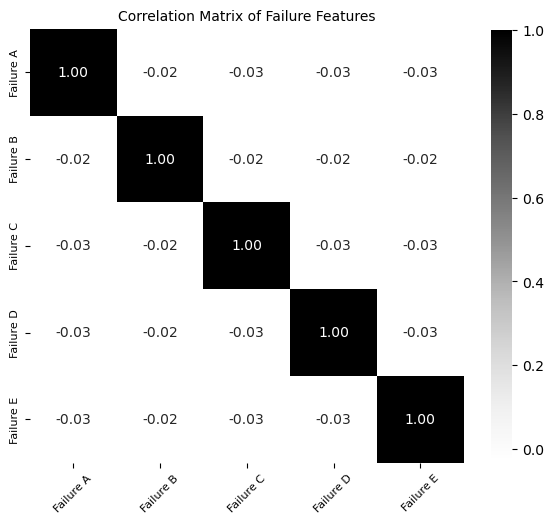

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']].corr()

plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Failure Features', fontsize=10)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.show()

#### Size of duplicated rows
- The .duplicated() method is used to identify duplicate rows
- The .shape attribute shows that duplicate data exists

In [13]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(81, 19)

- duplicated rows constitute less than 1% of dataset, thus dropping these duplicates should be safe

In [14]:
duplicated = duplicate_rows_df.shape[0]
total = df.shape[0]
print(duplicated/total)

0.008034917170915585


#### Removing duplicated rows
- The drop_duplicates() method is used to remove duplicate rows
- The .shape attribute shows the duplicate rows are removed

In [15]:
df = df.drop_duplicates()
df.shape

(10000, 19)

## Univariate and Bivariate Analysis

#### Plot histograms to visualise distribution of data
- The .hist() method is used to visualise the distribution of numerical data
- A bimodel distribution is observed for Temperature_C which may be caused by a difference in units
- Right skewed distributions are observed for RPM and Fuel consumption

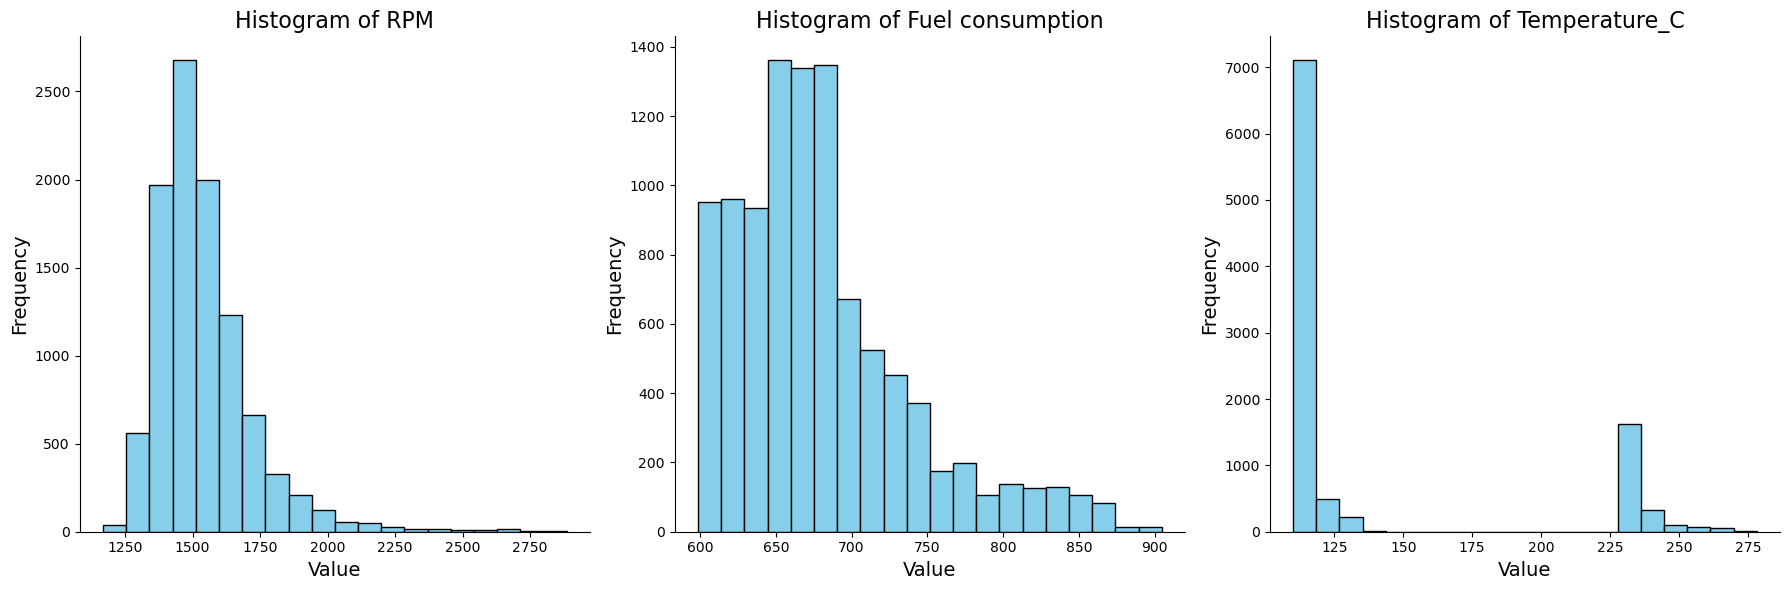

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']
            
for i in range(3):

    axs[i].hist(df[num_col[i]], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {num_col[i]}', fontsize=16)
    axs[i].set_xlabel('Value', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Compute skew
- The skew() function is used to measure the skewness of a distribution
- Positive values indicate a right-skewed distribution

In [17]:
from scipy.stats import skew

for col in num_col:
    skewness = skew(df[col])
    print(f"Skewness for {col}: {skewness}")

Skewness for RPM: 1.9928720166048546
Skewness for Fuel consumption: 1.1816765733672412
Skewness for Temperature_C: 1.37372252137373


#### Investigate bimodal distribution in Temperature_C
- A threshold variable is used to split Temperature_C values into 2 subsets
- Units for Temperature_C values are observed to be in °C in the first subset and °F in the second subset

In [18]:
threshold = 200

subset1 = df[df['Temperature_C'] <= threshold]
subset2 = df[df['Temperature_C'] > threshold]

subset1.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model_Name,Year,City,Country,Temperature_C
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0,Model 5,2022,Shang Hai,China,110.3
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0,Model 3,2022,Shang Hai,China,110.4
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0,Model 3,2022,Shang Hai,China,110.3
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0,Model 3,2022,Berlin,Germany,110.4
5,3b5e4310-9f3f-4c4d-92c3-ec09fa36f772,"Model 5, 2021",White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0,0,0,0,0,Model 5,2021,Shang Hai,China,110.3


In [19]:
subset2.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model_Name,Year,City,Country,Temperature_C
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0,Model 3,2022,New York,U.S,230.7
10,d0145579-a871-4dd4-aee8-ac43183de196,"Model 7, 2021",White,230.8 °F,1782,"New York, U.S",High,849.5,Premium,0,0,0,0,0,Model 7,2021,New York,U.S,230.8
11,c30a1d27-d6b5-454e-a96a-d9722408db5a,"Model 7, 2021",White,230.9 °F,1423,"New York, U.S",Low,801.8,Normal,0,0,0,0,0,Model 7,2021,New York,U.S,230.9
17,1b9c9f59-33f0-4488-933b-af26d2a208a6,"Model 5, 2020",Red,230.9 °F,1410,"New York, U.S",High,742.4,Normal,0,0,0,0,0,Model 5,2020,New York,U.S,230.9
24,4d69d500-7c92-403c-a7b8-ab3c2305d315,"Model 5, 2018",White,231.1 °F,1561,"New York, U.S",Low,675.5,Premium,0,1,0,0,0,Model 5,2018,New York,U.S,231.1


#### Unit conversion for Temperature_C
- The return_temp() function is expanded to convert °F to °C
- The bimodal distribution has vanished, indicating that all °F values are converted to °C
- A right-skewed distribution is now observed for Temperature_C

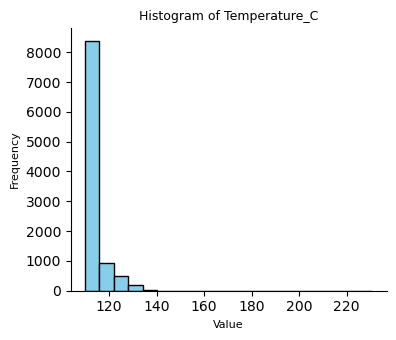

In [20]:
def return_temp1(length):
    if '°F' in length:
        temp = re.search(r'\d+\.\d+', length)
        if temp is not None:
            fahrenheit_temp = float(temp.group(0))
            return (fahrenheit_temp - 32) * 5.0/9.0
    else:
        temp = re.search(r'\d+\.\d+', length)
        if temp is not None:
            return float(temp.group(0))

df["Temperature_C"] = df.apply(lambda row: return_temp1(row['Temperature']), axis=1)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(17, 3.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 2])

ax = fig.add_subplot(gs[0])
ax.hist(df['Temperature_C'], bins=20, color='skyblue', edgecolor='black')
ax.set_title('Histogram of Temperature_C', fontsize=9)
ax.set_xlabel('Value', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Compute skew for updated Temperature_C values
- The skew() function is used to measure the skewness for Temperature_C
- The positive value coincides with the right-skewed distribution shown above

In [21]:
skewness = skew(df['Temperature_C'])
print(f"Skewness for Temperature_C: {skewness}")

Skewness for Temperature_C: 3.8017970145519624


#### Plot boxplots to detect outliers
- The .boxplot() method is used to detect outliers
- Outliers for Temperature_C are observed for values over 200°C

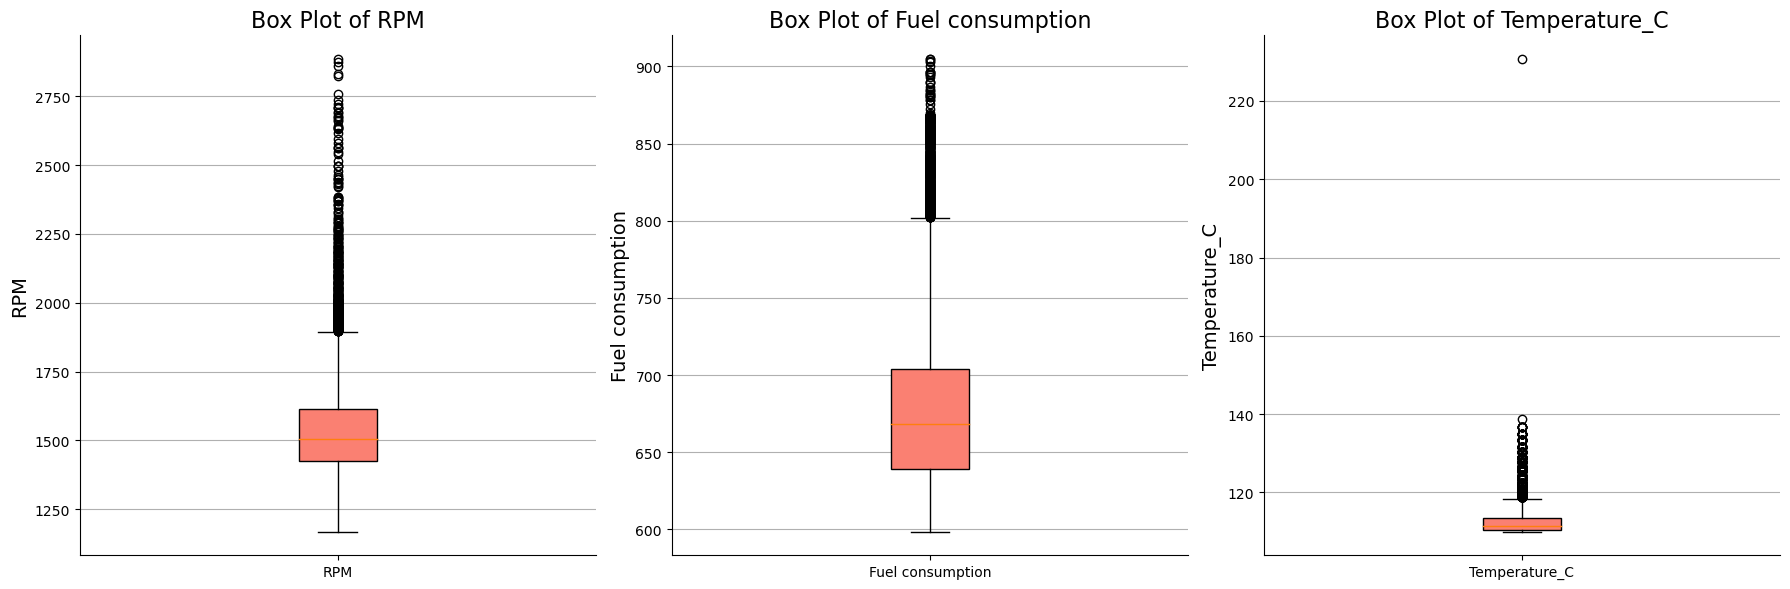

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']
            
for i in range(3):

    axs[i].boxplot(df[num_col[i]], vert=True, patch_artist=True, boxprops=dict(facecolor='salmon'))
    axs[i].set_title(f'Box Plot of {num_col[i]}', fontsize=16)
    axs[i].set_ylabel(num_col[i], fontsize=14)
    axs[i].set_xticklabels([num_col[i]])
    axs[i].grid(axis='y')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Investigate outliers in Temperature_C
- A threshold variable is used to determine how many outliers there are in the region of interest
- Number of outliers above 200°C is 1

In [23]:
th = 200

def find_outliers_threshold(data, th):
    outliers = data[data > th]
    return outliers

outliers_temp = find_outliers_threshold(df['Temperature_C'], th)
print(len(outliers_temp))

1


#### Removing outliers
- Removed the outlier as 230°C is outside normal engine operating temperature
- The plot below shows the outlier is removed

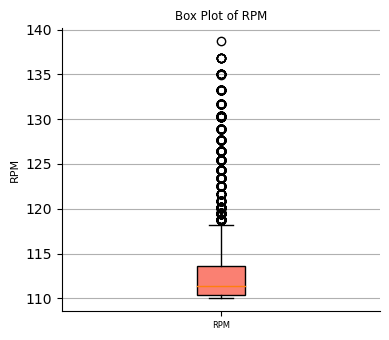

In [24]:
df = df[df['Temperature_C'] <= 150]

fig = plt.figure(figsize=(17, 3.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 2])

ax = fig.add_subplot(gs[0])
ax.boxplot(df[num_col[i]], vert=True, patch_artist=True, boxprops=dict(facecolor='salmon'))
ax.set_title('Box Plot of RPM', fontsize=8.5)
ax.set_ylabel('RPM', fontsize=8)
ax.set_xticklabels(['RPM'], fontsize=6)
ax.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Plot scatterplots to assess correlation
- The scatterplots are used to reveal correlations between numerical features
- The scatterplots suggests that there is little to no linear correlation among the features

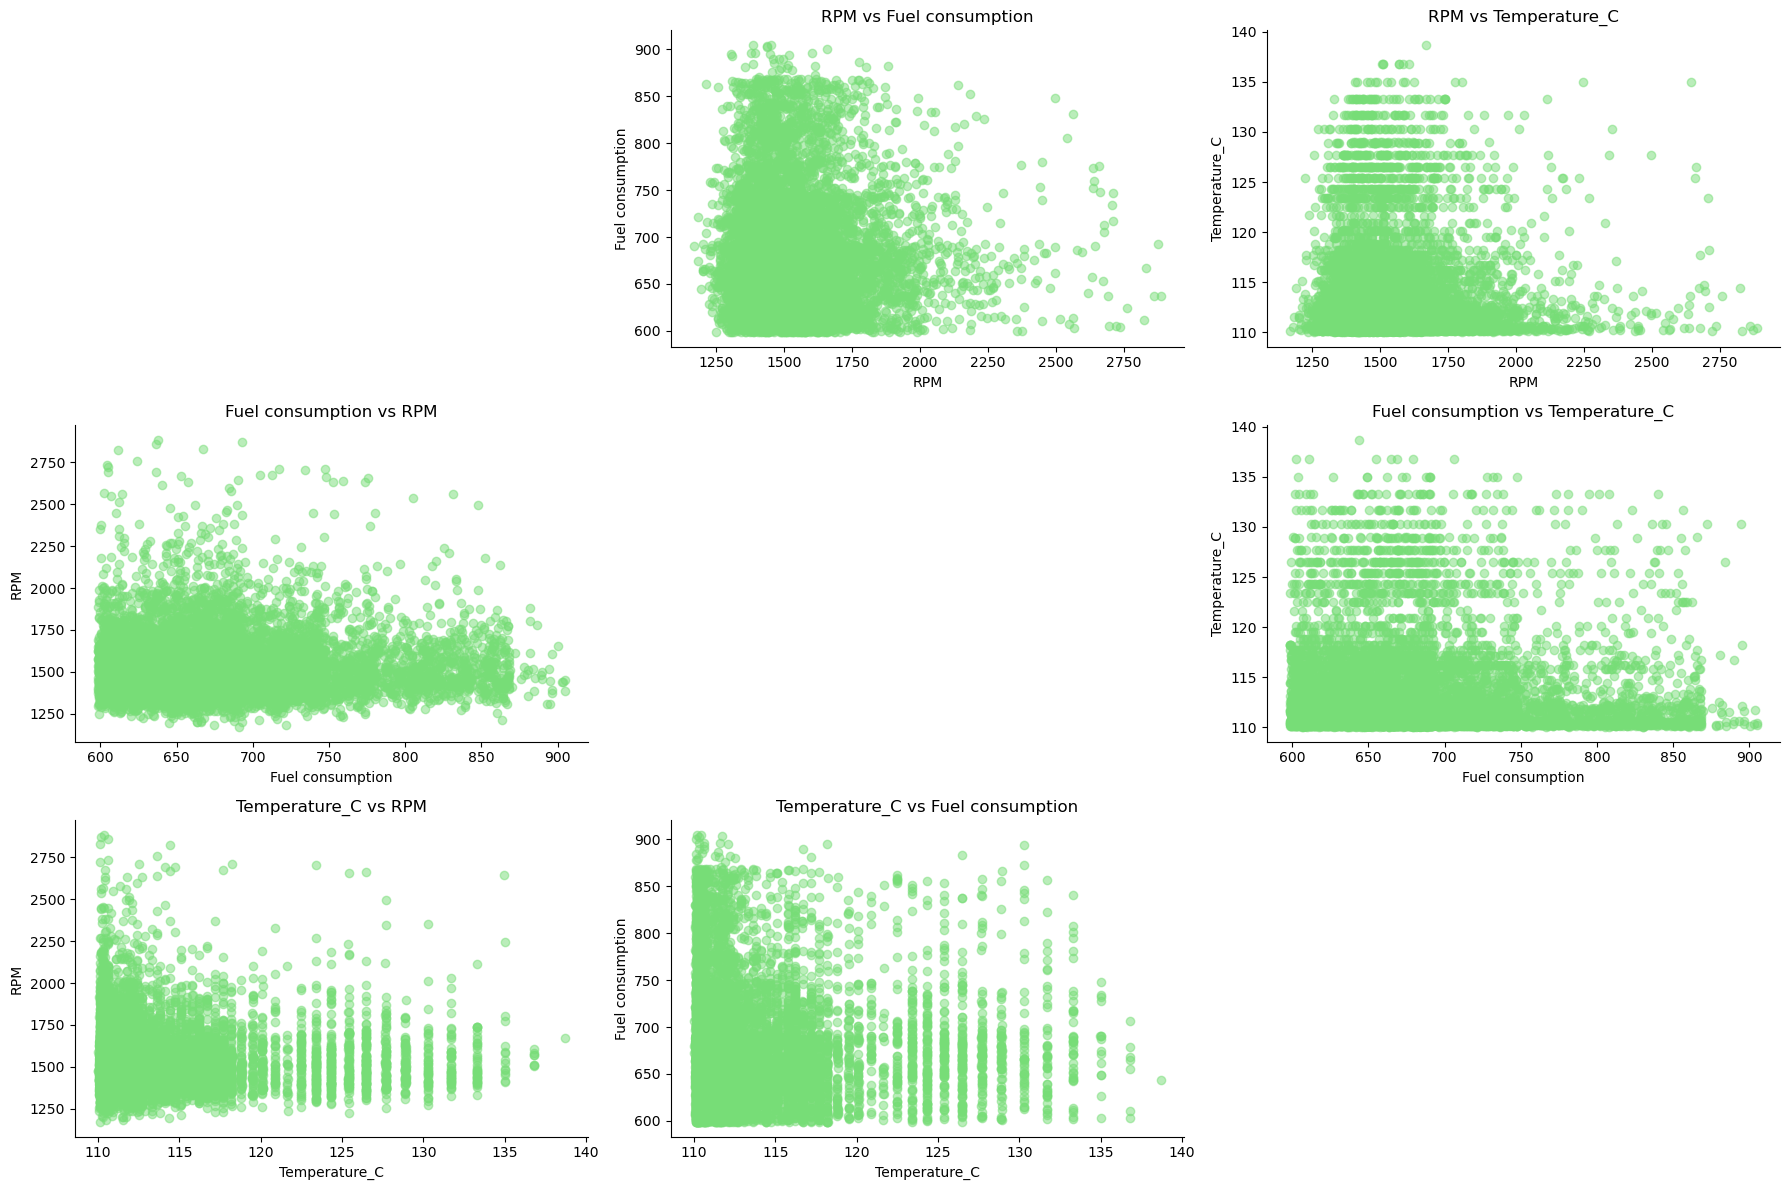

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], alpha=0.5, c='#77DD77')
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Plot hue scatterplots to identify class boundaries for target variables
- Hue scatterplots are used to identify class boundaries for the target variables
- There are 5 scatterplots, 1 for each target Failure
- The color dark blue represents the '1' class, while the color light blue represents the '0' class
- Since there are no distinct class boundaries among the binary outputs for Failures A to E, non-parametric models like K-nearest Neighbors will be more effective than parametric models such as logistic regression and Naive Bayes

#### Target variable - Failure A

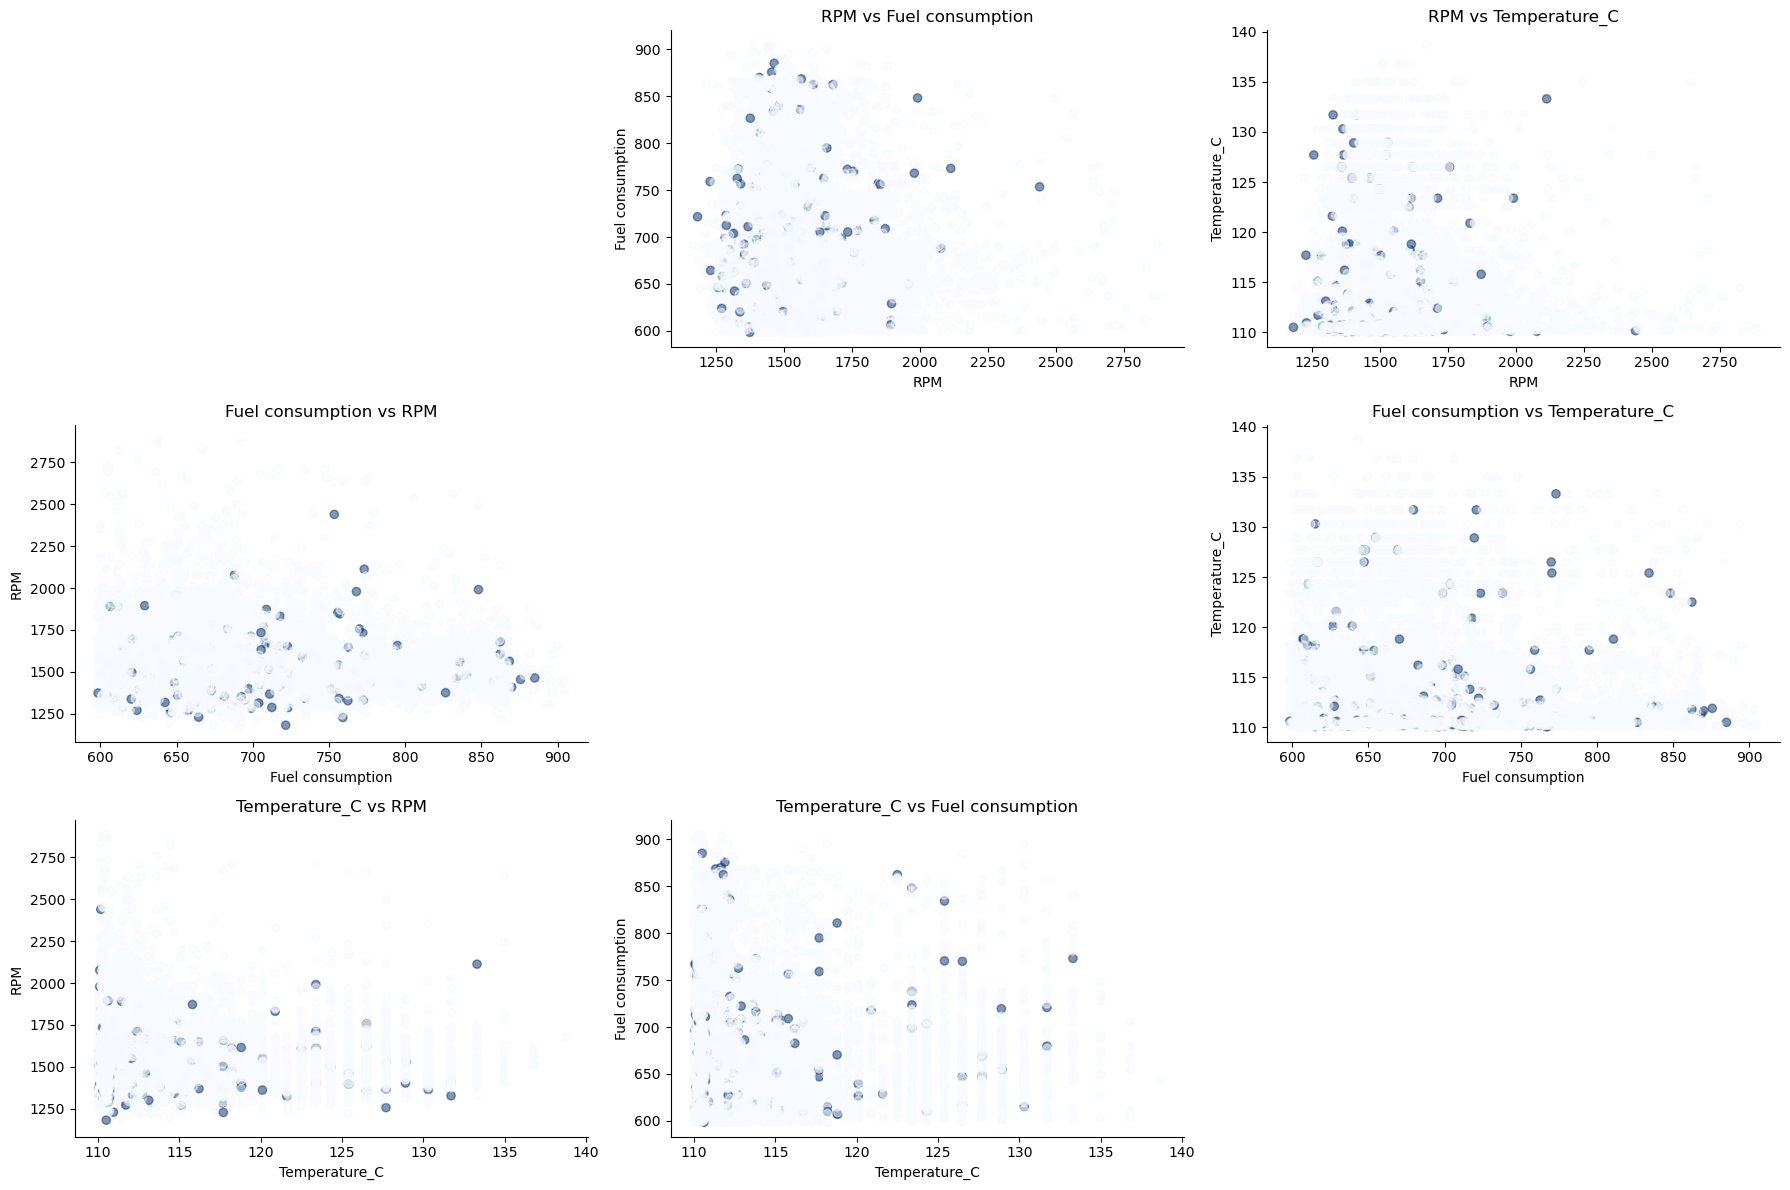

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], c=df['Failure A'], cmap='Blues', alpha=0.5)
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Target variable - Failure B

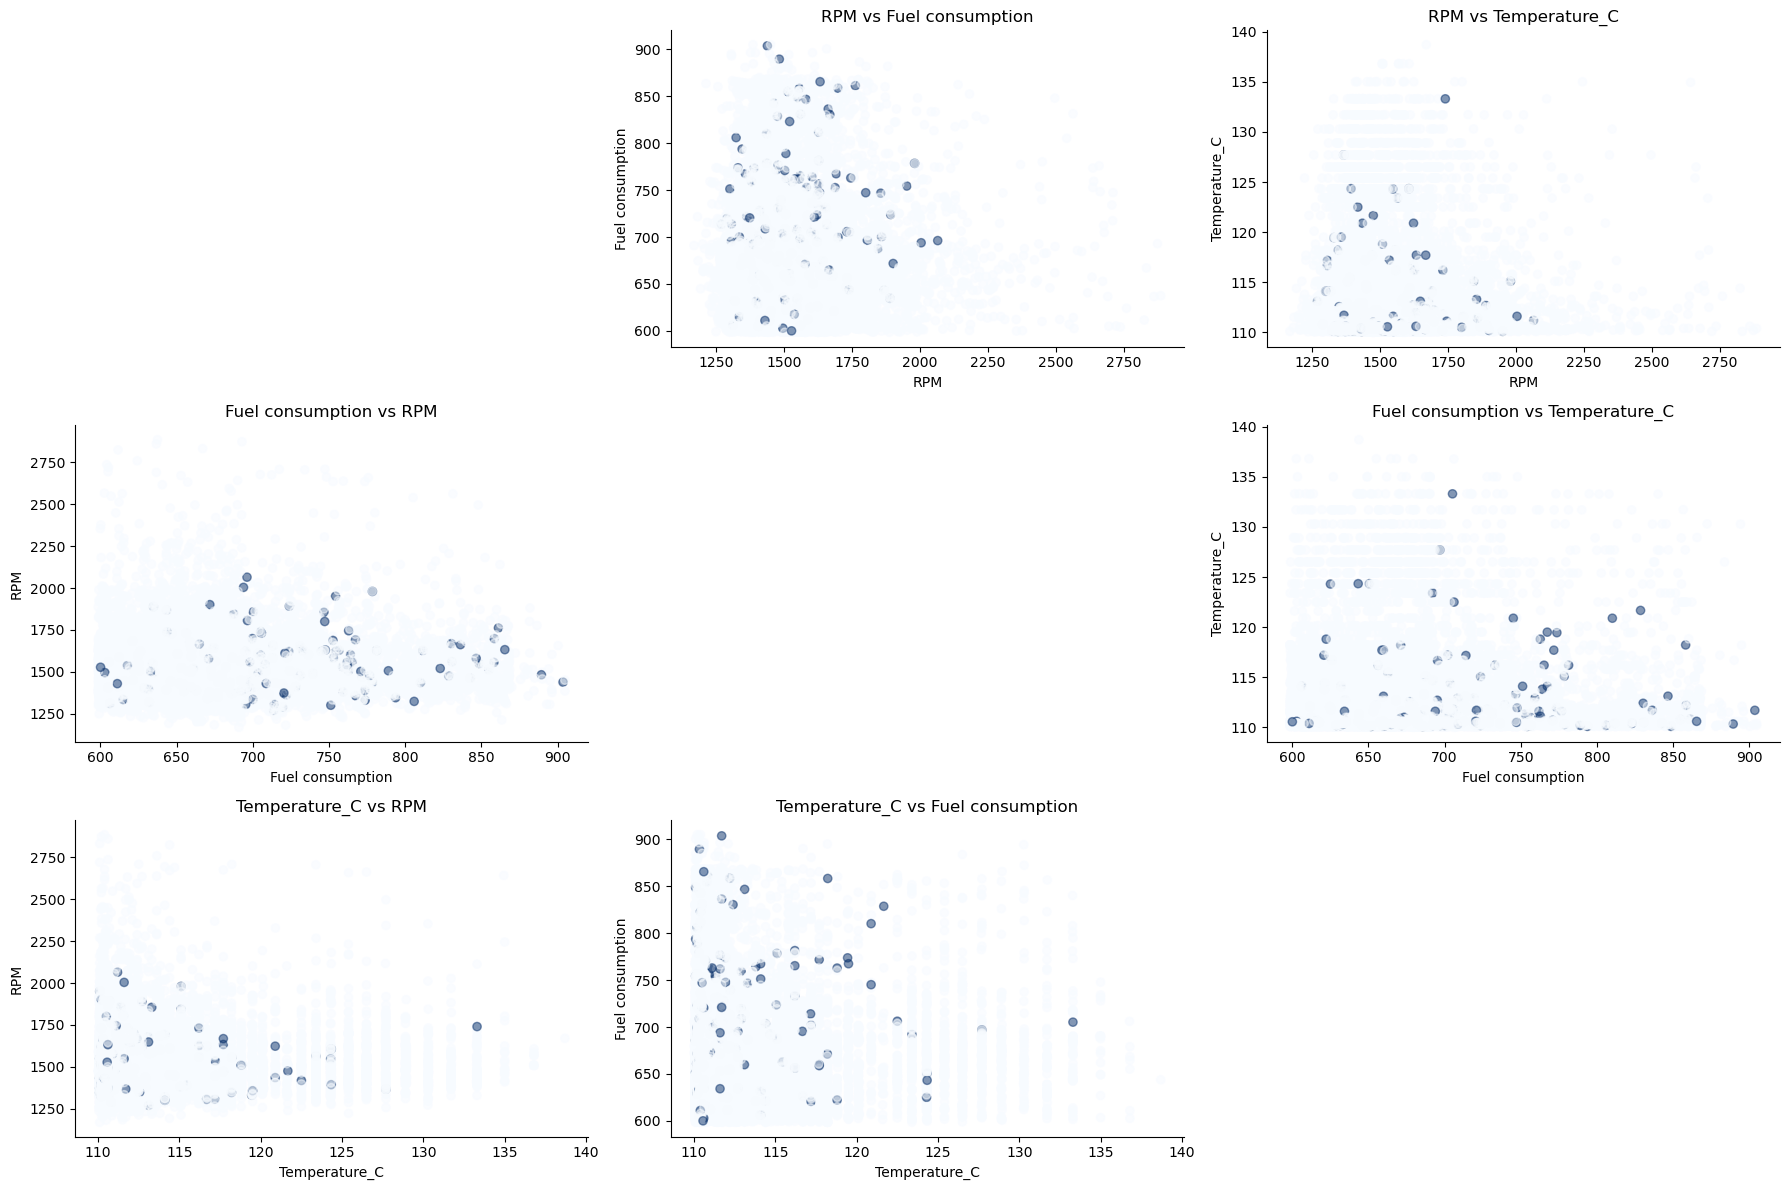

In [27]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], c=df['Failure B'], cmap='Blues', alpha=0.5)
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Target variable - Failure C

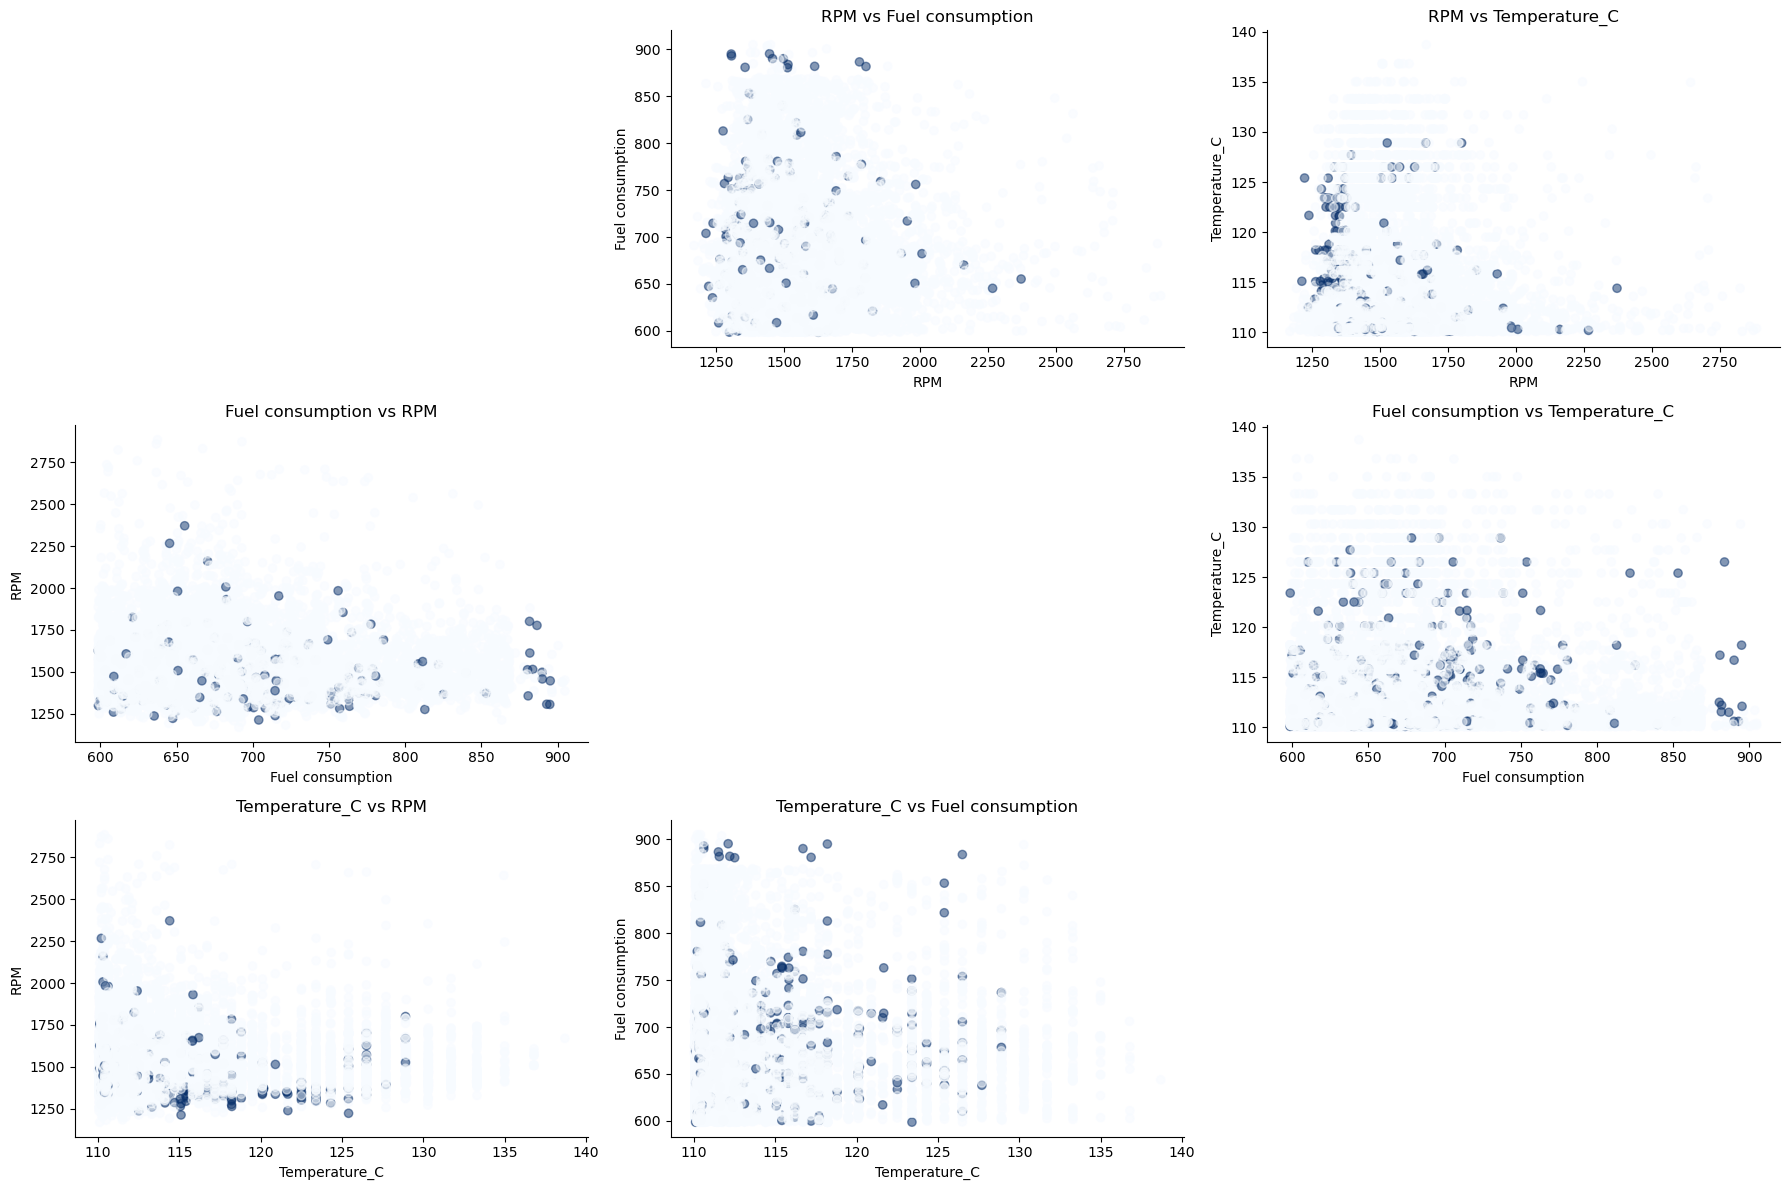

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], c=df['Failure C'], cmap='Blues', alpha=0.5)
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Target variable - Failure D

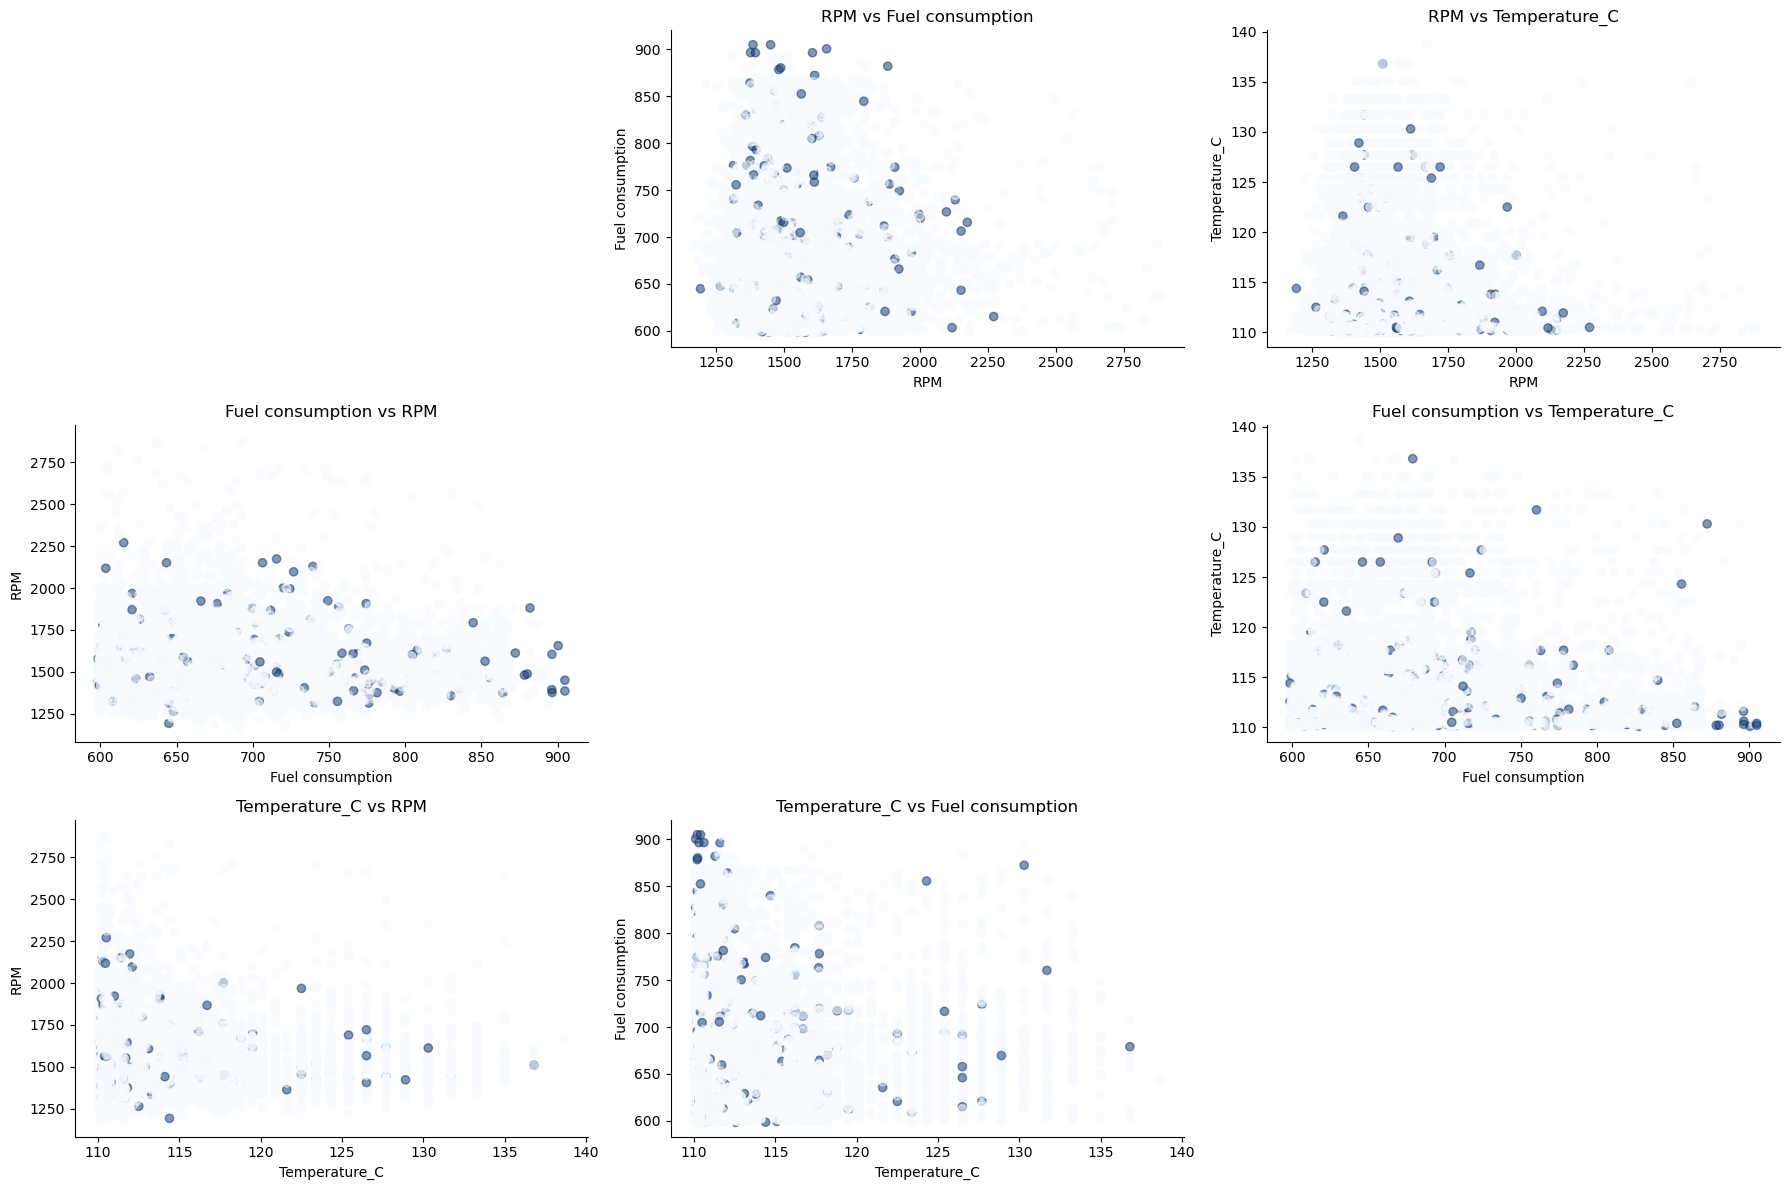

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], c=df['Failure D'], cmap='Blues', alpha=0.5)
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Target variable - Failure E

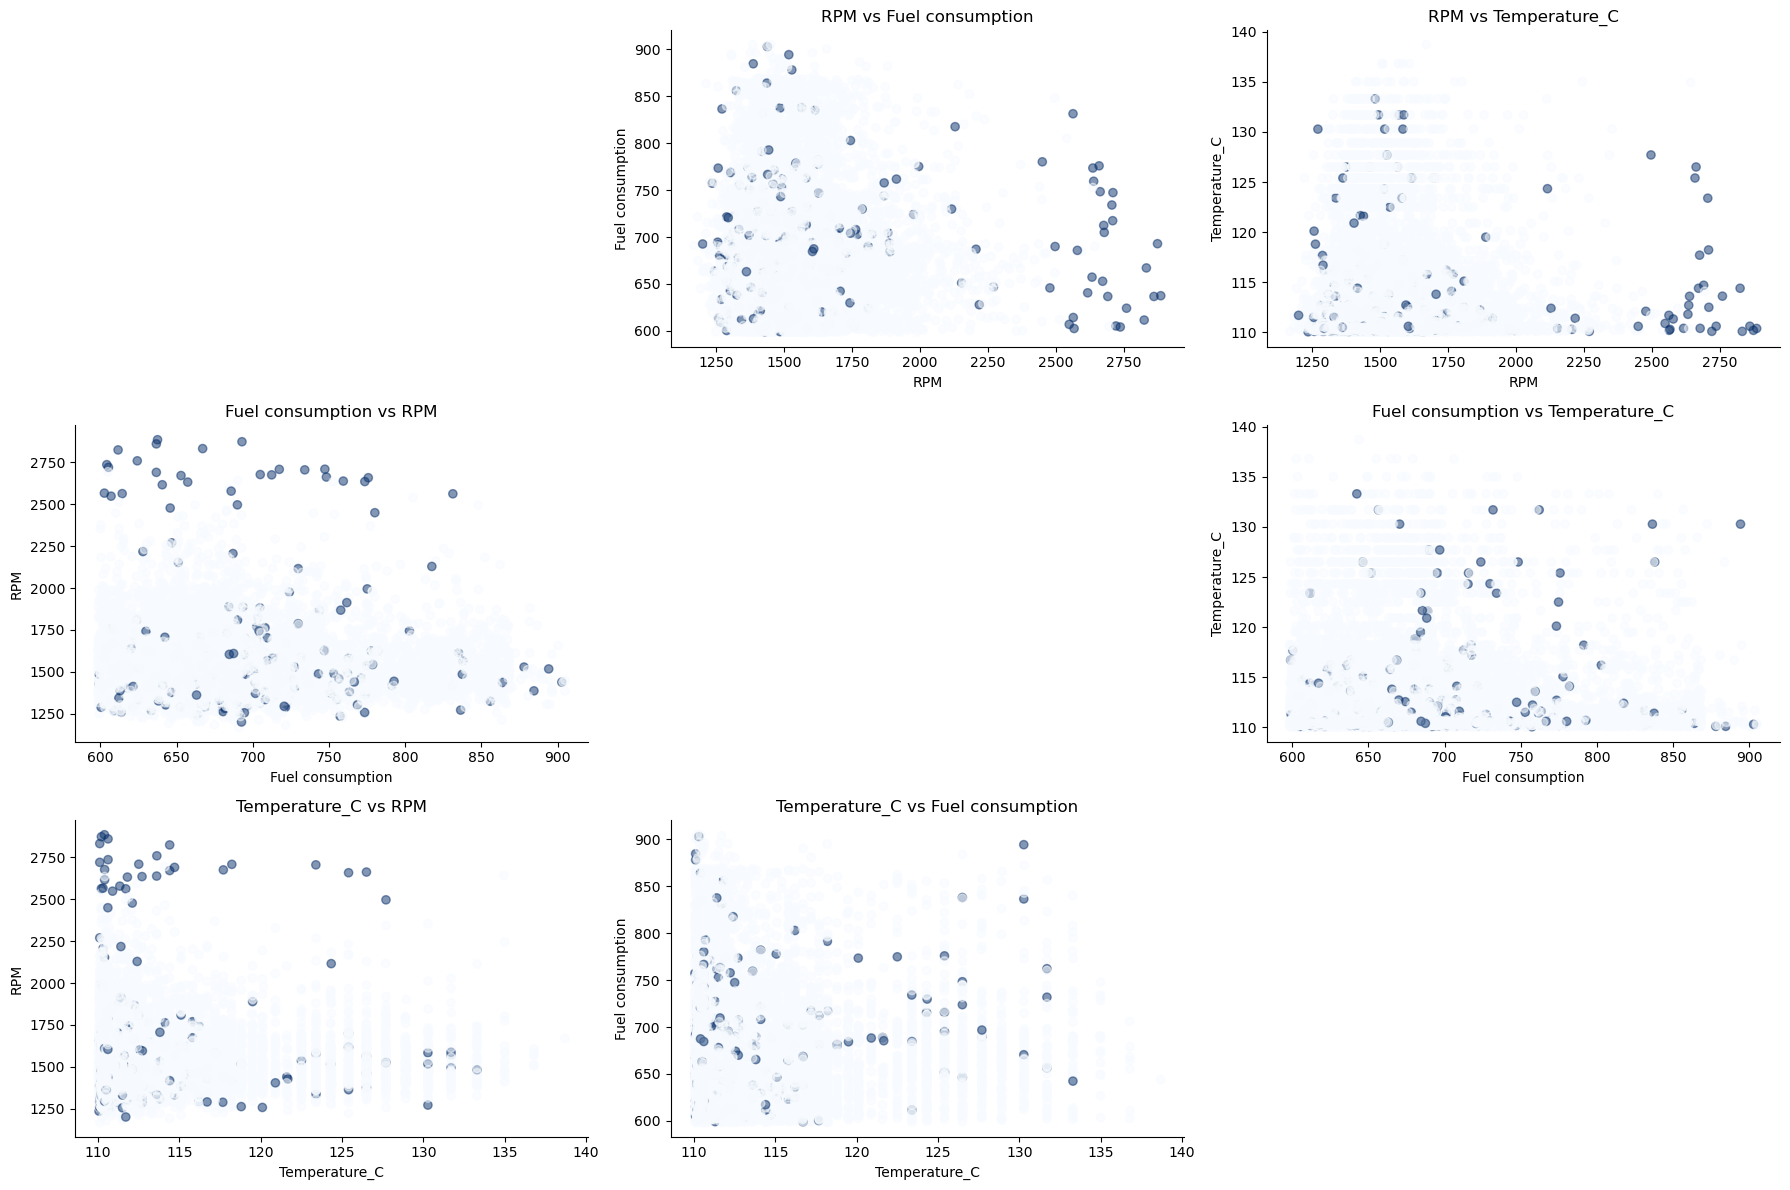

In [30]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']

for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:
            axs[i, j].scatter(df[num_col[i]], df[num_col[j]], c=df['Failure E'], cmap='Blues', alpha=0.5)
            axs[i, j].set_xlabel(num_col[i])
            axs[i, j].set_ylabel(num_col[j])
            axs[i, j].set_title(f'{num_col[i]} vs {num_col[j]}')
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

#### Correlation matrix for numerical variables
- The correlation matrix is used to evaluate the presence of correlations between numerical variables
- Since the correlation coefficients are all close to zero, it suggests that there is little to no linear correlation among these variables

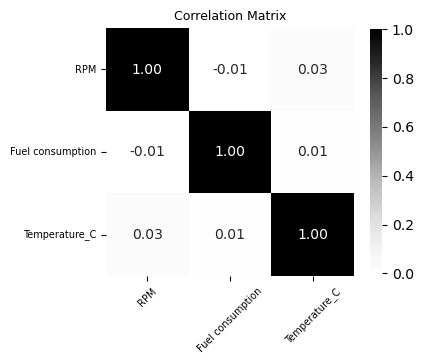

In [31]:
correlation_matrix = df[num_col].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greys', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=9)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.show()

#### Variance inflation factor (VIF)
- Variance inflation factor (VIF) is used to detect multicollinearity
- High VIFs for RPM, Fuel consumption and Temperature_C suggests they are highly correlated with one another
- VIF will be recomputed after normalisation and standardisation to check if true multicollinearity exists

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = df[['RPM', 'Fuel consumption', 'Temperature_C']]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_results = calculate_vif(numerical_cols)

print(vif_results)

            Feature         VIF
0               RPM   68.872015
1  Fuel consumption  114.223174
2     Temperature_C  161.230087


#### Plot bar plots to visualise frequency distribution in categorical variables
- The bar plots are used to visualise the frequency distribution of categorical features
- Class imbalance is observed for most categorical features except for Usage and Year

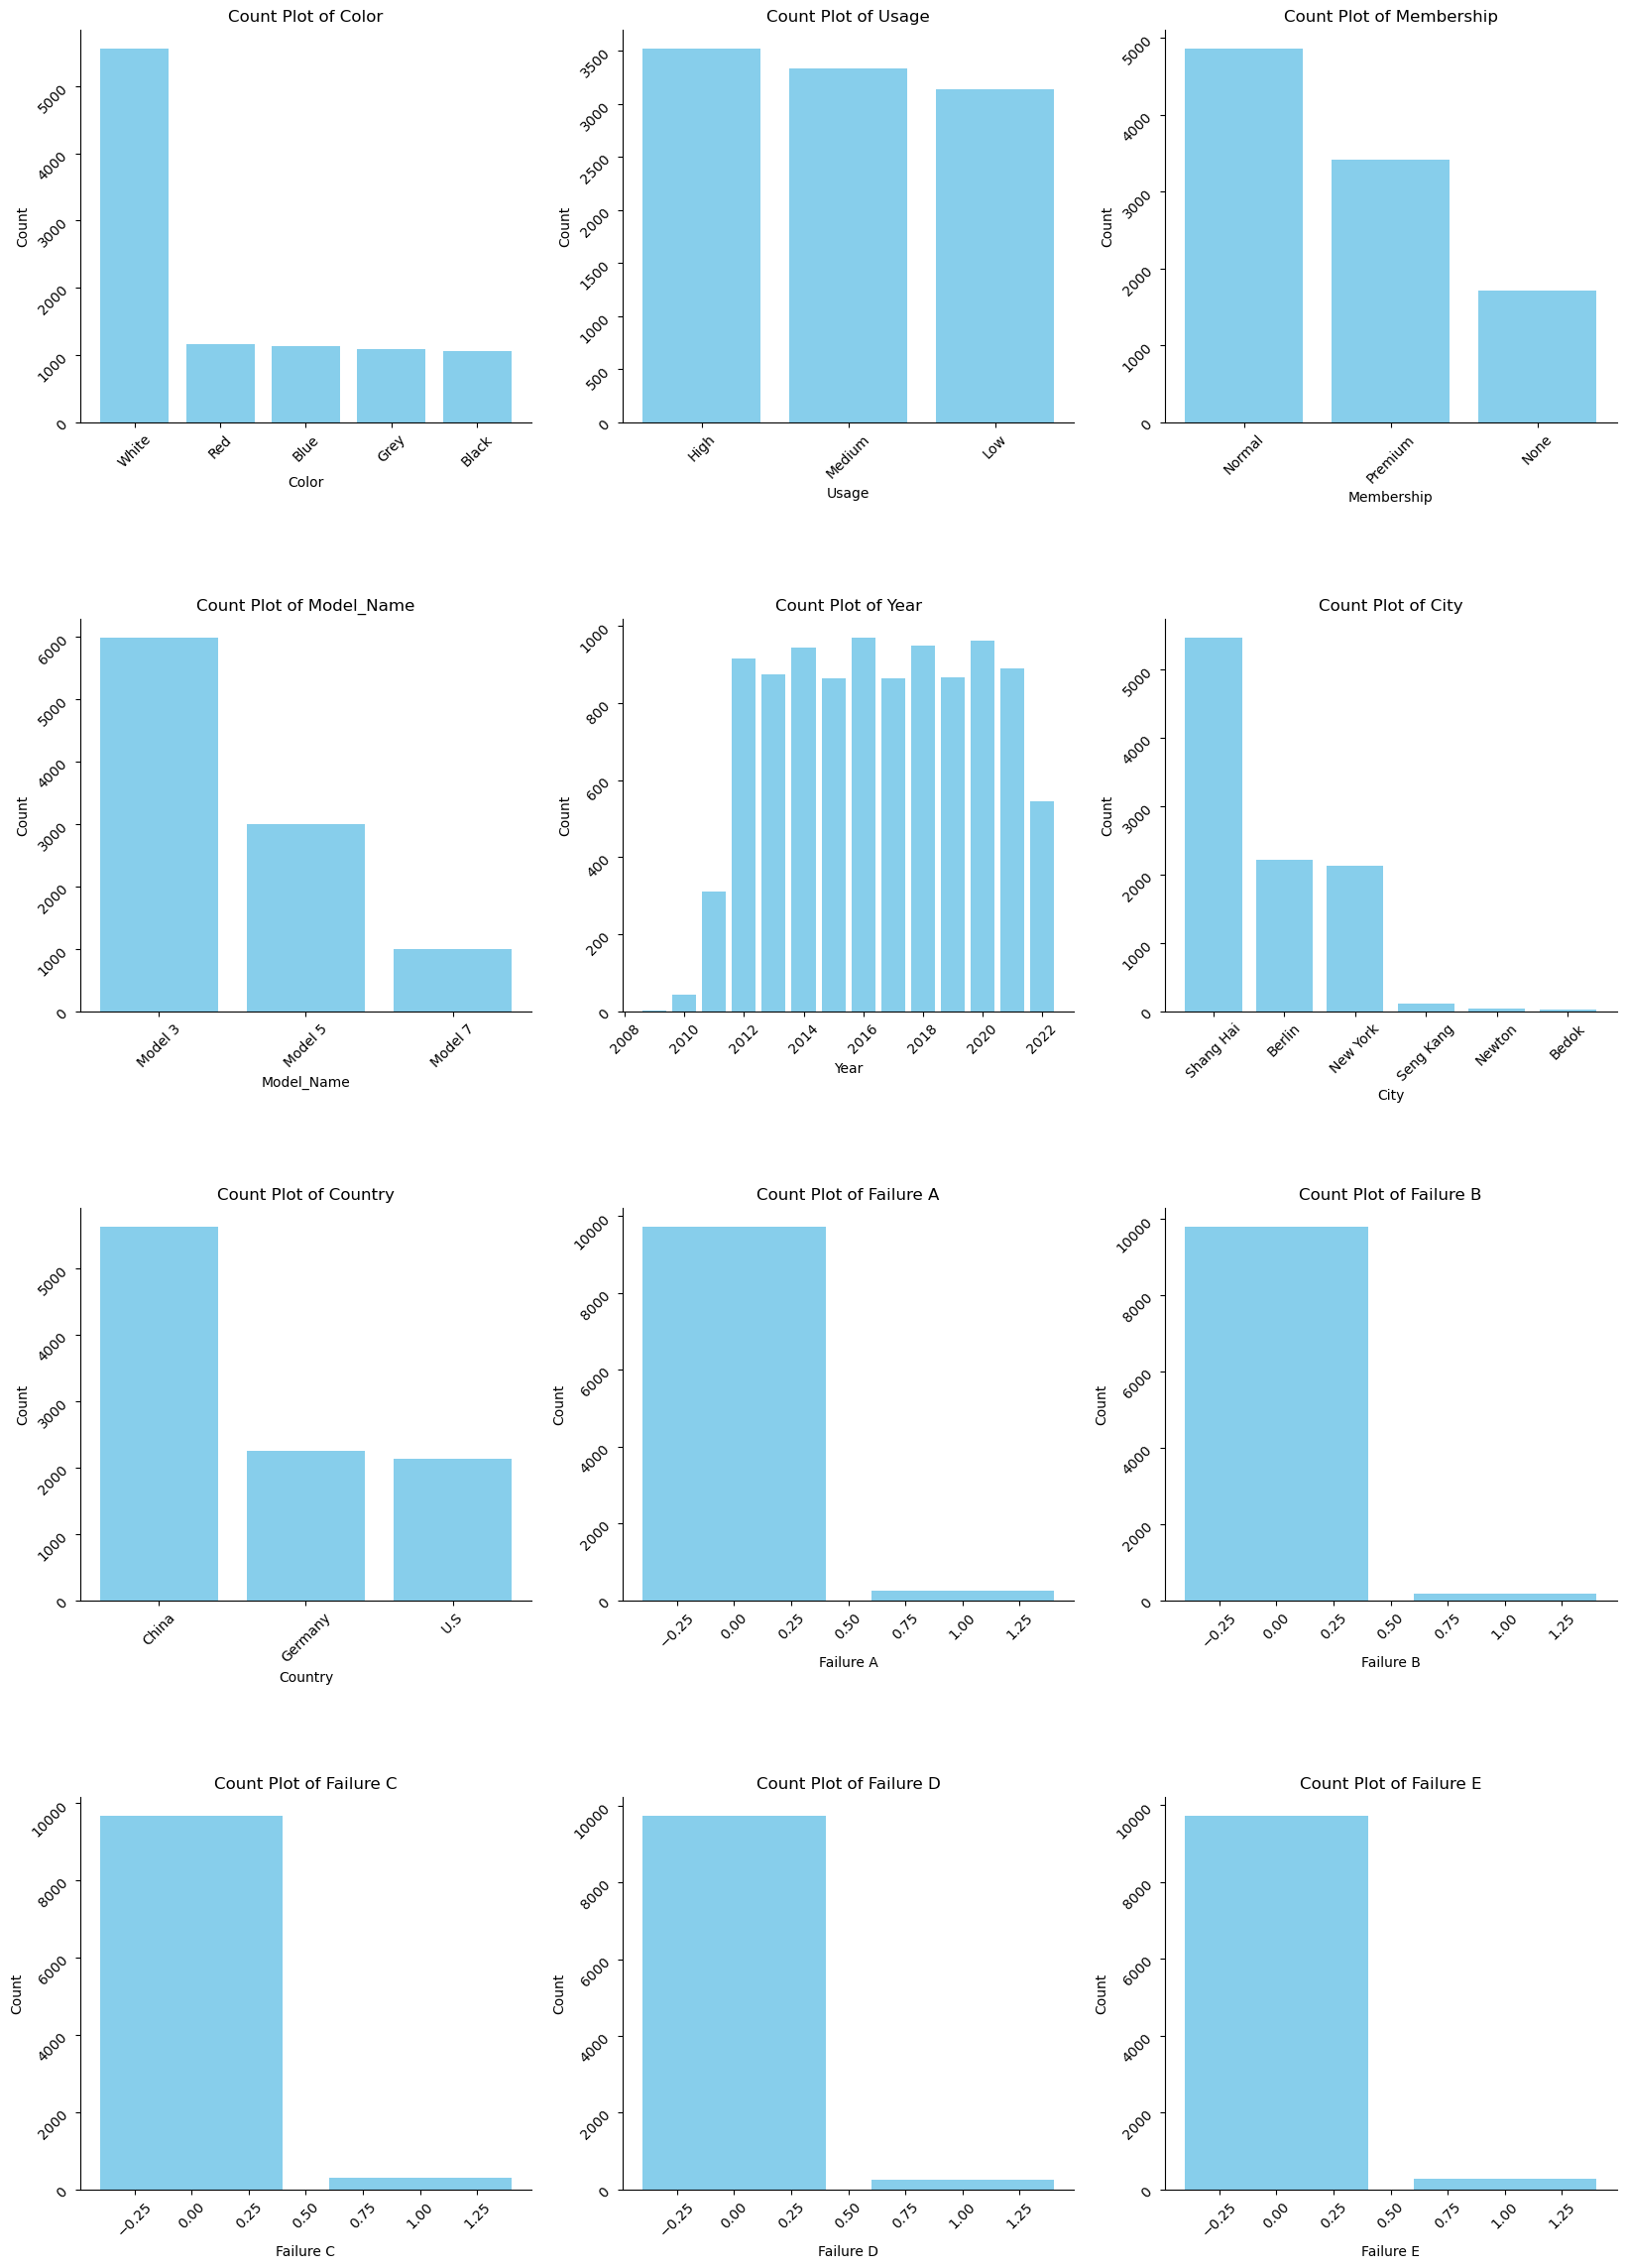

In [33]:
plt.figure(figsize=(20, 36))

cat_col = ['Color', 'Usage', 'Membership', 'Model_Name', 'Year', 'City', 'Country', 'Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']

for i, column in enumerate(cat_col):
    ax = plt.subplot(5, 3, i + 1)
    
    counts = df[column].value_counts()

    ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Stacked bar plot
- A stacked bar plot was used to observe changes in target variables on a year to year basis
- There is no clear trend in the amount of any one Failure throughout the years

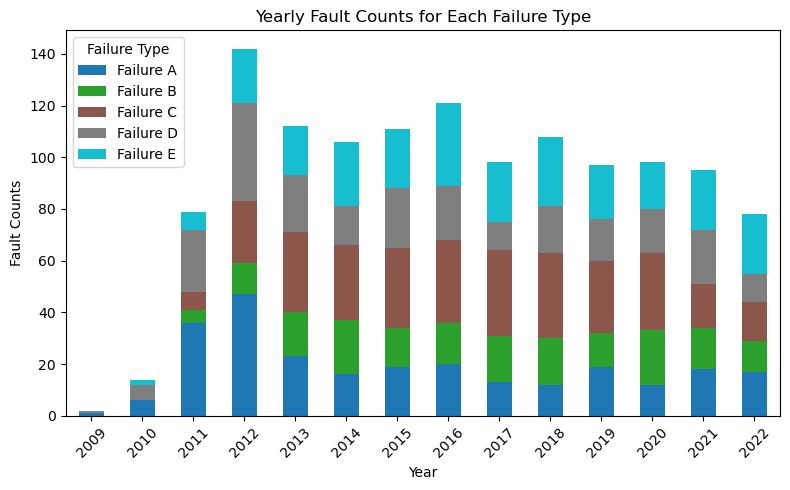

In [34]:
df_count = df[['Failure A', 'Failure B', 'Failure C', 'Failure D' ,'Failure E', 'Year']].groupby('Year').sum()

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Creating a stacked bar chart
df_count.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Fault Counts')
plt.title('Yearly Fault Counts for Each Failure Type')
plt.legend(title='Failure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data standardisation

#### Log normalisation
- The np.log() method is used to reduce the skewness of a right-skewed distribution of RPM, Fuel Consumption and Temperature
- The .hist() method is used to visualise the reduced skewness of the numerical features
- Here log transformation is used to reduce variance

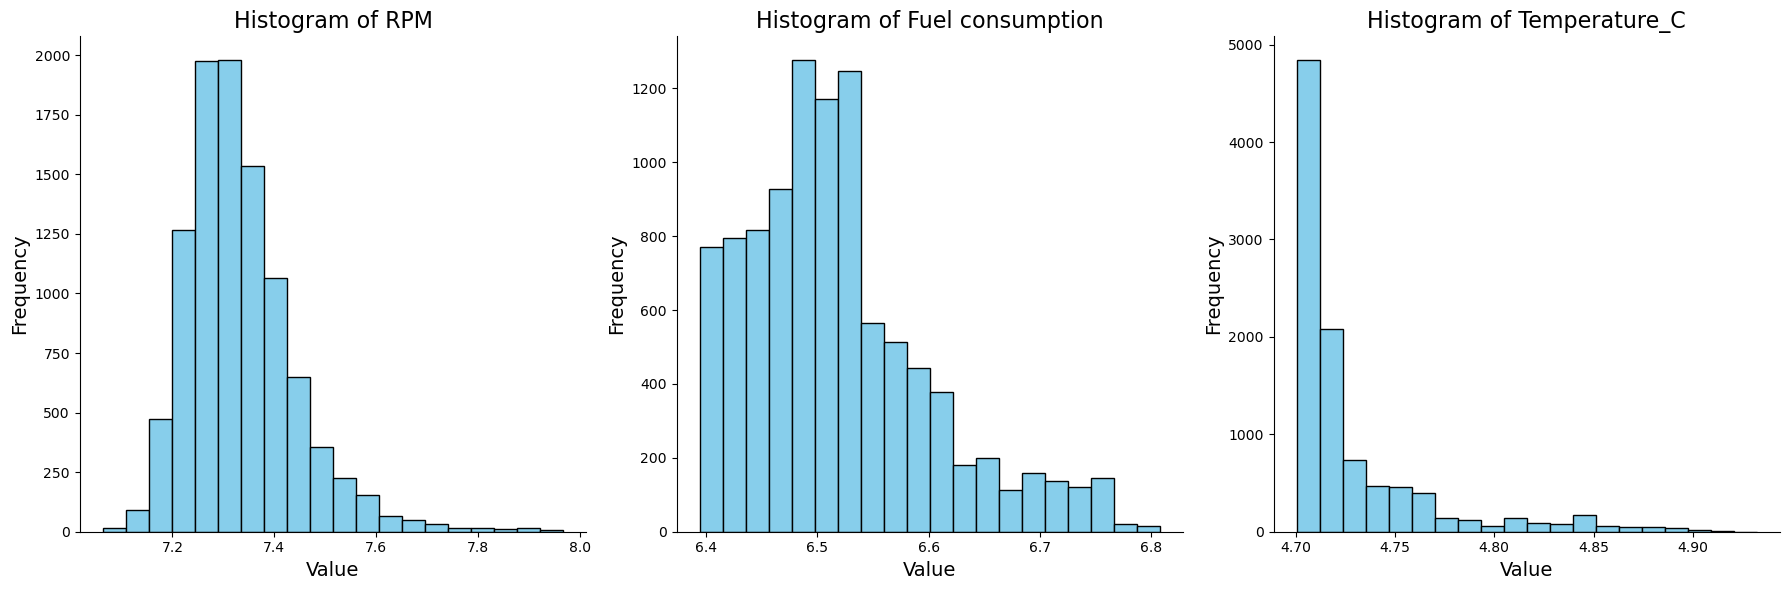

In [35]:
import numpy as np

num_col = ['RPM', 'Fuel consumption', 'Temperature_C']
for col in num_col:
    df[col] = np.log(df[col])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

num_feat = ['RPM', 'Fuel consumption', 'Temperature_C']
            
for i in range(3):

    axs[i].hist(df[num_feat[i]], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {num_feat[i]}', fontsize=16)
    axs[i].set_xlabel('Value', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Reduction in skew after log normalisation
- skew() is used again to measure the skewness for Temperature_C after log transformation is applied
- The skewness for RPM is reduced from 1.99 to 1.31
- The skewness for Fuel consumption is reduced from 1.18 to 0.95
- The skewness for Temperature_C is reduced from 3.8 to 2.32

In [36]:
from scipy.stats import skew

for col in num_col:
    skewness = skew(df[col])
    print(f"Skewness for {col}: {skewness}")

Skewness for RPM: 1.3090387655006142
Skewness for Fuel consumption: 0.9528069000937806
Skewness for Temperature_C: 2.325457011141286


#### Standardisation
- The StandardScaler() module is used to normalise the scales for numerical variables
- This step is necessary because algorithms like Support Vector Machines (SVM), and those based on Gradient Descent are sensitive to the scale of the input data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['RPM', 'Fuel consumption', 'Temperature_C']] = scaler.fit_transform(df[['RPM', 'Fuel consumption', 'Temperature_C']])
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Year,Temperature_C
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03
mean,2.728354e-15,1.287255e-15,0.025903,0.018402,0.031003,0.024402,0.026403,2016.605761,-1.445998e-14
std,1.000050e+00,1.000050e+00,0.158853,0.134406,0.173335,0.154303,0.160337,3.202755,1.000050e+00
min,-2.507935e+00,-1.494251e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,-7.093883e-01
25%,-6.711658e-01,-7.040360e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,-6.143739e-01
50%,-1.624238e-01,-1.545615e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,-3.783357e-01
75%,4.887839e-01,4.755694e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.335759e-01
max,5.905823e+00,3.511421e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,5.359178e+00


#### Variance inflation factor (VIF) after normalisation & standardisation
- Variance inflation factor (VIF) is used again to detect multicollinearity
- VIF values close to 1 suggests absence of any correlation among the numerical variables
- Normalisation and standardisation may have helped to reduce the correlation

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = df[['RPM', 'Fuel consumption', 'Temperature_C']]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_results = calculate_vif(numerical_cols)

print(vif_results)

            Feature       VIF
0               RPM  1.000731
1  Fuel consumption  1.000137
2     Temperature_C  1.000693


## Feature Engineering

#### One-hot encoding
- The .get_dummies() method is used to encode categorical features
- Color, Usage, Membership, Model_Name, City and Country are recognized as nominal data, thus one-hot encoding is used to not imply any form of order 
- No clear signs of progression in each fault or in the total number of faults, hence Year is treated as nominal
- The first category is dropped to avoid multicollinearity, where one category can perfectly be predicted by others
- The encoded features Color, Usage, Membership, Model_Name, Year, City and Country are dropped as they are considered redundant

In [39]:
df = pd.get_dummies(df, columns=['Model_Name', 'Year', 'City', 'Country', 'Color', 'Usage', 'Membership'], drop_first=True)
df.head()

,Car ID,Model,Temperature,RPM,Factory,Fuel consumption,Failure A,Failure B,Failure C,Failure D,...,Country_Germany,Country_U.S,Color_Blue,Color_Grey,Color_Red,Color_White,Usage_Low,Usage_Medium,Membership_Normal,Membership_Premium
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",110.3 °C,0.129979,"Shang Hai, China",-0.315058,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",110.4 °C,-0.769732,"Shang Hai, China",0.494474,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",110.3 °C,-0.193418,"Shang Hai, China",-0.114767,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",110.4 °C,-0.606030,"Berlin, Germany",-0.861465,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,3b5e4310-9f3f-4c4d-92c3-ec09fa36f772,"Model 5, 2021",110.3 °C,-0.658102,"Shang Hai, China",0.260396,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


## Feature Selection

#### Redundant features
- The .drop() method is used to remove redundant features
- The feature Car ID is is eliminated as it serves as a unique identifier
- Features like Temperature, Model and Factory are also dropped as they are considered as engineered features
- the .shape attribute is used to view the final dimensions of the dataset

In [40]:
df_dropped = df.drop(['Car ID', 'Temperature', 'Model', 'Factory'], axis=1)
df_dropped.head()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Temperature_C,Model_Name_Model 5,Model_Name_Model 7,...,Country_Germany,Country_U.S,Color_Blue,Color_Grey,Color_Red,Color_White,Usage_Low,Usage_Medium,Membership_Normal,Membership_Premium
0,0.129979,-0.315058,0,0,0,0,0,-0.638095,1,0,...,0,0,1,0,0,0,0,1,1,0
1,-0.769732,0.494474,1,0,0,0,0,-0.614374,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.193418,-0.114767,0,0,0,0,0,-0.638095,0,0,...,0,0,0,1,0,0,1,0,0,1
3,-0.606030,-0.861465,1,0,0,0,0,-0.614374,0,0,...,1,0,0,0,0,0,0,0,0,1
5,-0.658102,0.260396,0,0,0,0,0,-0.638095,1,0,...,0,0,0,0,0,1,0,1,0,1


In [41]:
df_dropped.shape

(9999, 38)